# QUIZ 2 - Visão Computacional

### Matheus Pimenta

Esse trabalho tem como objetivo avaliar e comparar diferentes métodos de calibração de câmera, utilizando o Naive method, um toolkit do Octave e a calibração direta (via SVD).

Para esse celular foi utilizado um Xiaomi Mi A2 Lite.

## Parte 1 - Naive Method

O primeiro método consiste em tirar uma foto de um livro, paralelo a uma superfície plana, realizar medidas das distâncias e dimensões no mundo real e na imagem, e calcular fx e fy e a matriz de parâmetros intrínsecos. São realizadas algumas pressuposições (centro do livro no centro da imagem e pixels quadrados).

Abaixo temos a imagem, colocando algus grids para melhor visibilidade:

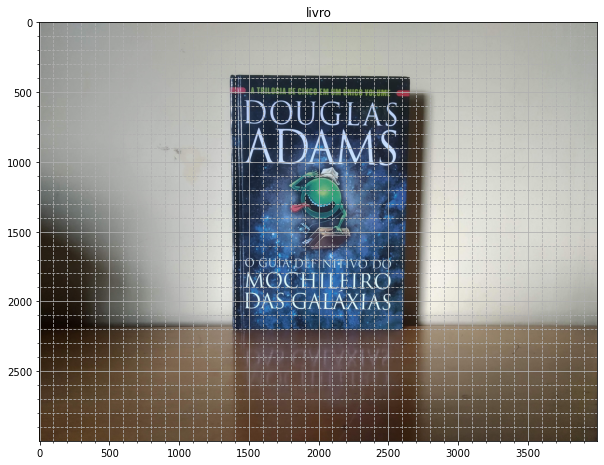

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

livro_img = cv2.imread('images/livro.jpg')
livro_img = cv2.cvtColor(livro_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(livro_img)
plt.title('livro')
plt.minorticks_on()

plt.grid(b=True, which='major')
plt.grid(b=True, which='minor', linestyle='--')
plt.show()

É perceptível que houve um certo Tilt na imagem. Para (tentar compensar), calculei as medidas como a média das obtidas em cima e embaixo (ou do ladoe squero e direito). Esses cálculos e as medidas realizadas estão abaixo:

In [2]:
X = 16.5
Y = 23.7
Z = 41.4
x = ((2650-1360)+(2600-1390))/2
y = ((2200-375)+(2200-385))/2

Ao final, obtemos os seguintes valores:

In [3]:
fx = x*Z/X
fy = y*Z/Y
print(fx, fy)

3136.3636363636365 3179.240506329114


E a matriz dos parâmetros intrínsecos, considerando que os pontos centrais cx e cy são metade das dimensões da imagem (4000x3000) é:

In [4]:
np.array([[fx,0,1500],[0,fy,2000],[0,0,1]])

array([[3.13636364e+03, 0.00000000e+00, 1.50000000e+03],
       [0.00000000e+00, 3.17924051e+03, 2.00000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Pesquisando na internet, encontrei que o sensor da minha câmera é 5.1x3.8, bem como o f mínimo é 3.88mm. Como F(mm) = F(pixels) * SensorWidth(mm) / ImageWidth (pixel) , podemos calcular da seguinte forma:

In [5]:
sensor_side = (np.sqrt(5.1*3.8))/2  #por conta da pressuposição
image_side = (np.sqrt(4000*3000))/2
Fx = fx*sensor_side/image_side
Fy = fy*sensor_side/image_side
print(Fx, Fy)

3.9857740312389986 4.040263093944544


O que acabou por gerar valores até próximos.

## Parte 2 - toolkit Octave

Nessa etapa foi utilizado o toolkit disponibilizado pelo professor, e feita a calibração com base em algumas fotos de um tabuleiro.

As imagens utilizadas foram:

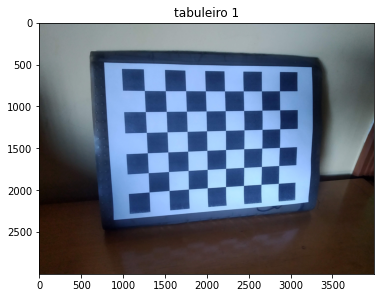

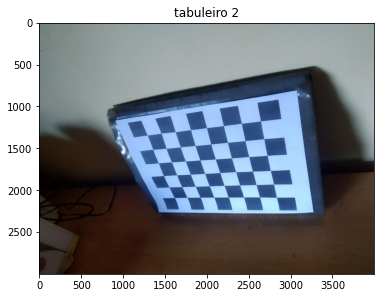

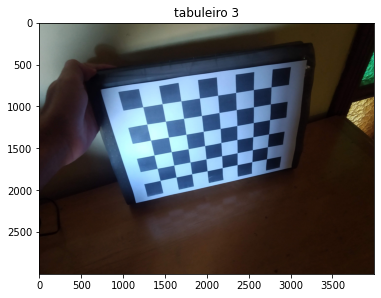

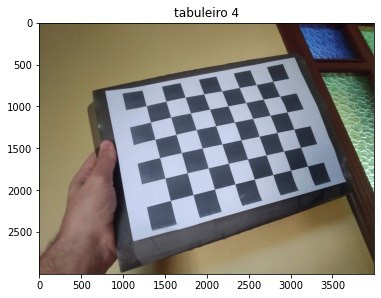

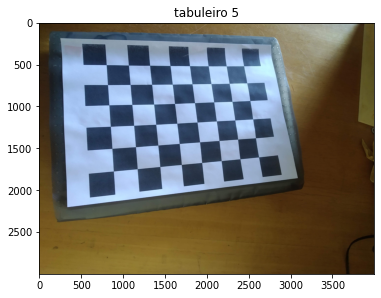

In [6]:
plt.figure(figsize=(6,6))

tab = cv2.imread('images/tabuleiro_1.jpg')
tab = cv2.cvtColor(tab, cv2.COLOR_BGR2RGB)
plt.imshow(tab)
plt.title('tabuleiro 1')
plt.show()

plt.figure(figsize=(6,6))
tab = cv2.imread('images/tabuleiro_2.jpg')
tab = cv2.cvtColor(tab, cv2.COLOR_BGR2RGB)
plt.imshow(tab)
plt.title('tabuleiro 2')
plt.show()

plt.figure(figsize=(6,6))
tab = cv2.imread('images/tabuleiro_3.jpg')
tab = cv2.cvtColor(tab, cv2.COLOR_BGR2RGB)
plt.imshow(tab)
plt.title('tabuleiro 3')
plt.show()

plt.figure(figsize=(6,6))
tab = cv2.imread('images/tabuleiro_4.jpg')
tab = cv2.cvtColor(tab, cv2.COLOR_BGR2RGB)
plt.imshow(tab)
plt.title('tabuleiro 4')
plt.show()

plt.figure(figsize=(6,6))
tab = cv2.imread('images/tabuleiro_5.jpg')
tab = cv2.cvtColor(tab, cv2.COLOR_BGR2RGB)
plt.imshow(tab)
plt.title('tabuleiro 5')
plt.show()

Os resultados obtidos pelo toolkit foram:

*Calibration results after optimization (with uncertainties):*

*Focal Length:*          fc = [ 3166.05489   3146.91057 ] +/- [ 127.71068   132.75104 ]

*Principal point:*       cc = [ 1890.26701   1605.42562 ] +/- [ 100.49372   90.12731 ] 

*Skew:*             alpha_c = [ 0.00000 ] +/- [ 0.00000  ]   => angle of pixel axes = 90.00000 +/- 0.00000 degrees

*Distortion:*            kc = [ 0.13284   -0.66756   0.00161   -0.01110  0.00000 ] +/- [ 0.13743   0.60277   0.01213   0.01258  0.00000 ]

*Pixel error:*          err = [ 4.69824   5.83434 ] 

*Note: The numerical errors are approximately three times the standard deviations (for reference).*


Os valores obtidos foram bem próximos do primeiro método (melhor dizendo, os do primeiro foram próximos do segundo, já que esse é mais preciso). Fazendo os mesmos cálculos para achar o F em mm:

In [7]:
fx=3166.05489
fy=3146.91057
sensor_side = (np.sqrt(5.1*3.8))/2
image_side = (np.sqrt(4000*3000))/2
Fx = fx*sensor_side/image_side
Fy = fy*sensor_side/image_side
print(Fx, Fy)

4.023506463258889 3.9991773540264535


## Parte 3 - Calibração direta

A terceira parte consiste em fazer a calibração diretamente, medindo os pontos na "mão" e fazendo todo o processo descrito no livro do *Trucco* e *Verri*, no capítulo 6.

Para coleta dos pontos, foi utilizado o imshow do cv2. Enquanto nenhuma tecla é pressionada, no canto da imagem é possível ver as coordenadas do mouse, e portanto pegar os pontos. 

Segue o código comentado, pois depois de uma tecla pressionada ela acaba travando, impedindo o fluxo normal.

In [8]:
# cv2.namedWindow("output", cv2.WINDOW_NORMAL)
# img = cv2.imread("2_tab.jpg")
# cv2.imshow("output", img)
# cv2.waitKey(0)


Fzendo as medidas do tabuleiro impresso, cada quadrado tem 28mm de lado, e tem 7mm de espaço branco entre a lateral da folha e o primeiro quadrado.

Foram pegos 12 pontos em cada plano, sendo cada um a quina superior direita da fileira com 3 quadrados pretos. O ponto (0,0,0) é a quina inferiro do primeiro quadrado da fileira com 3. Abaixo, uma projeção desses pontos (mais a origem):

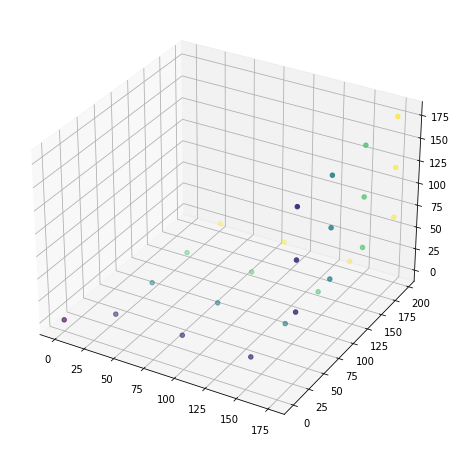

In [9]:
world_points = [
    [0,0,0],
    [28,28,0],
    [84,28,0],
    [140,28,0],
    [28,84,0],
    [84,84,0],
    [140,84,0],
    [28,140,0],
    [84,140,0],
    [140,140,0],
    [28,196,0],
    [84,196,0],
    [140,196,0],
    [175,28,65],
    [175,28,121],
    [175,28,177],
    [175,84,65],
    [175,84,121],
    [175,84,177],
    [175,140,65],
    [175,140,121],
    [175,140,177],
    [175,196,65],
    [175,196,121],
    [175,196,177]
]

xdata = []
ydata = []
zdata = []

for i in range(len(world_points)):
    xdata.append(world_points[i][0])
    ydata.append(world_points[i][1])
    zdata.append(world_points[i][2])

plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    
ax = plt.axes(projection='3d')

ax.scatter3D(xdata, ydata, zdata, c=ydata);

Abaixo temos os pontos obtidos da medição, bem como a imagem utilizada. Para visualizarmos os pontos obtidos, os mesmos estão printados em vermelho em cima da imagem, com auxílio da função pyplot.scatter

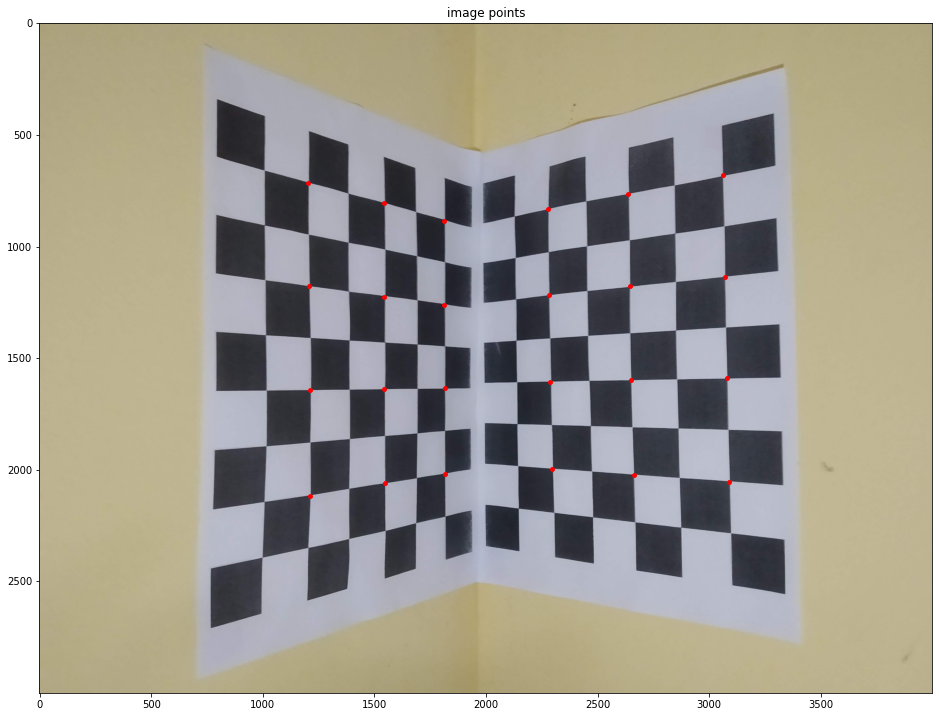

In [10]:
two_planes_img = cv2.imread('images/2_tab.jpg')
two_planes_img = cv2.cvtColor(two_planes_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))

img_points = [
    [1212,2116],     #1
    [1548,2058],     #2
    [1816,2021],     #3
    [1212,1642],     #4
    [1544,1640],     #5
    [1818,1636],     #6
    [1207,1178],     #7
    [1541,1225],     #8
    [1811,1262],     #9
    [1202,716],      #10
    [1544,807],      #11
    [1814,885],      #12
    [2295,1998],     #13
    [2663,2025],     #14
    [3090,2057],     #15
    [2289,1607],     #16
    [2652,1600],     #17
    [3082,1590],     #18
    [2282,1218],     #19
    [2645,1175],     #20
    [3072,1136],     #21
    [2280,831],      #22
    [2638,763],      #23
    [3062,678]       #24
]

x_img=[]
y_img=[]

for i in range(len(img_points)):
    x_img.append(img_points[i][0])
    y_img.append(img_points[i][1])

    
plt.imshow(two_planes_img)
plt.title('image points')
plt.scatter(x=x_img, y=y_img, c='r', s=15)
plt.show()

O próximo passo consicte em montar a matriz A, a partir dos pontos medidos:

In [11]:
A = []

world_points.pop(0) #removendo origem

for i in range(len(world_points)):
    a = world_points[i][0]*img_points[i][0]
    b = world_points[i][1]*img_points[i][0]
    c = world_points[i][2]*img_points[i][0]
    d = img_points[i][0]
    e = -(world_points[i][0]*img_points[i][1])
    f = -(world_points[i][1]*img_points[i][1])
    g = -(world_points[i][2]*img_points[i][1])
    h = -(img_points[i][1])
    A.append([a,b,c,d,e,f,g,h])
    
print(A)

[[33936, 33936, 0, 1212, -59248, -59248, 0, -2116], [130032, 43344, 0, 1548, -172872, -57624, 0, -2058], [254240, 50848, 0, 1816, -282940, -56588, 0, -2021], [33936, 101808, 0, 1212, -45976, -137928, 0, -1642], [129696, 129696, 0, 1544, -137760, -137760, 0, -1640], [254520, 152712, 0, 1818, -229040, -137424, 0, -1636], [33796, 168980, 0, 1207, -32984, -164920, 0, -1178], [129444, 215740, 0, 1541, -102900, -171500, 0, -1225], [253540, 253540, 0, 1811, -176680, -176680, 0, -1262], [33656, 235592, 0, 1202, -20048, -140336, 0, -716], [129696, 302624, 0, 1544, -67788, -158172, 0, -807], [253960, 355544, 0, 1814, -123900, -173460, 0, -885], [401625, 64260, 149175, 2295, -349650, -55944, -129870, -1998], [466025, 74564, 322223, 2663, -354375, -56700, -245025, -2025], [540750, 86520, 546930, 3090, -359975, -57596, -364089, -2057], [400575, 192276, 148785, 2289, -281225, -134988, -104455, -1607], [464100, 222768, 320892, 2652, -280000, -134400, -193600, -1600], [539350, 258888, 545514, 3082, -2

Com a matriz em mãos, calculamos o SVD da mesma, e pegamos a linha de Vt corresponente ao valor nulo da diagonal de S (ou o menor valor, caso nenhum seja nulo)

In [12]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

In [13]:
S

array([2.69869247e+06, 8.58451957e+05, 6.30951051e+05, 2.19724500e+05,
       1.03386555e+05, 6.23825376e+04, 1.72736863e+03, 1.36798668e+01])

In [14]:
Vt

array([[-6.36534971e-01, -4.50386242e-01, -4.38295117e-01,
        -3.87527804e-03,  3.37863291e-01,  2.05147400e-01,
         2.08844877e-01,  2.14356226e-03],
       [ 1.02669146e-01, -7.19134375e-01,  4.26439614e-01,
        -9.50689892e-04, -2.01267037e-01,  3.47852388e-01,
        -3.59086949e-01,  8.87453721e-05],
       [ 2.22798914e-01, -2.80530896e-01, -6.11332853e-01,
         2.80478891e-03, -6.70879871e-01, -2.04505508e-01,
         7.74256994e-02, -5.50385505e-03],
       [-4.53434127e-01, -1.10219439e-01,  1.64903395e-01,
         4.58435787e-03, -6.99792189e-02, -7.61857574e-01,
        -4.11889840e-01, -7.59778769e-03],
       [-2.13969000e-01, -1.10165284e-01,  4.74036173e-01,
         6.34540253e-03, -3.25391368e-01, -1.39918501e-01,
         7.69216996e-01, -1.33717719e-02],
       [ 5.32112627e-01, -4.20707489e-01, -1.93533356e-02,
        -9.19329860e-03,  5.33065123e-01, -4.41656664e-01,
         2.45103960e-01,  1.03589382e-02],
       [-1.05913756e-02,  3.098969

Não foi obtido nenhum valor nulo em S. Isso ocorre, segundo os autores, devido a ruido e erros de medida.

Abaixo, uma confirmação de que a norma dessa linha é 1:

In [15]:
ans = 0
for i in range(len(Vt[7])):
    ans = ans + (Vt[7][i]*Vt[7][i])
    
ans

1.0000000000000004

Com esses valores é possível calcular os parâmetros gama (em módulo) e alhpa:

In [16]:
V_sol = Vt[7]
gama_mod = np.sqrt(V_sol[0]**2 + V_sol[1]**2 + V_sol[2]**2)
alpha_gama_mod = np.sqrt(V_sol[4]**2 + V_sol[5]**2 + V_sol[6]**2)
alpha = alpha_gama_mod/gama_mod


gama_mod, alpha

(0.0037773426921651806, 1.0340782813058929)

E com esses valores, é possível obter as duas primeiras linhas da matriz de rotação R e os dois primeiros elementos do vetor de translação T:

In [17]:
R = np.array([
    [V_sol[4]/(alpha*gama_mod), V_sol[5]/(alpha*gama_mod), V_sol[6]/(alpha*gama_mod)],
    [V_sol[0]/gama_mod, V_sol[1]/gama_mod, V_sol[2]/gama_mod],
    [0,0,0]
])

T = np.array([[V_sol[7]/(alpha*gama_mod)],[V_sol[3]/gama_mod],[0]])

R

array([[ 0.93698459,  0.00593423,  0.34932027],
       [ 0.34063099, -0.88957151, -0.30435678],
       [ 0.        ,  0.        ,  0.        ]])

In [18]:
T

array([[100.37297518],
       [243.53682236],
       [  0.        ]])

A terceira linha de R é o produto cruzado das duas linhas de R

In [19]:
R[2] = np.cross(R[0], R[1])

R

array([[ 0.93698459,  0.00593423,  0.34932027],
       [ 0.34063099, -0.88957151, -0.30435678],
       [ 0.30893924,  0.40416692, -0.83553619]])

Agora, o livro nos diz que para algum ponto, calculando sua coordenada x vezes a soma dos elementos de R vezes as coordenadas do mundo real (conforme fórmula abaixo), se o resultado for maior que 0, os sinais dos elementos das linhas 0 e 1 de R e T tem que ser invertidas.

In [20]:
img_points[5][0]*(R[0][0]*world_points[5][0]+R[0][1]*world_points[5][0]+R[0][2]*world_points[5][0] + T[0])

array([511378.76534524])

Como o valor foi negativo, não precisamos trocar:

In [21]:
# for i in range(3):
#     R[0][i] = (-1)*R[0][i]
#     R[1][i] = (-1)*R[1][i]
    
# T[0] = (-1)*T[0]
# T[1] = (-1)*T[1]

R

array([[ 0.93698459,  0.00593423,  0.34932027],
       [ 0.34063099, -0.88957151, -0.30435678],
       [ 0.30893924,  0.40416692, -0.83553619]])

In [22]:
T

array([[100.37297518],
       [243.53682236],
       [  0.        ]])

Agora, o próximo passo consiste em calcular uma outra matriz A e a matriz b, conforme o livro na página 130:

In [23]:
new_A = np.zeros((24,2))
b = np.zeros(24)

In [24]:
for i in range((24)):
    new_A[i] = [img_points[i][0], (R[0][0]*world_points[i][0]+R[0][1]*world_points[i][1]+R[0][2]*world_points[i][2])]
    b[i] = -1*img_points[i][0]*(R[2][0]*world_points[i][0]+R[2][1]*world_points[i][1]+R[2][2]*world_points[i][2])
    
new_A

array([[1212.        ,   26.40172719],
       [1548.        ,   78.87286449],
       [1816.        ,  131.34400179],
       [1212.        ,   26.73404427],
       [1544.        ,   79.20518157],
       [1818.        ,  131.67631887],
       [1207.        ,   27.06636135],
       [1541.        ,   79.53749865],
       [1811.        ,  132.00863595],
       [1202.        ,   27.39867844],
       [1544.        ,   79.86981574],
       [1814.        ,  132.34095303],
       [2295.        ,  186.84428045],
       [2663.        ,  206.40621584],
       [3090.        ,  225.96815122],
       [2289.        ,  187.17659754],
       [2652.        ,  206.73853292],
       [3082.        ,  226.3004683 ],
       [2282.        ,  187.50891462],
       [2645.        ,  207.07085   ],
       [3072.        ,  226.63278538],
       [2280.        ,  187.8412317 ],
       [2638.        ,  207.40316708],
       [3062.        ,  226.96510246]])

In [25]:
b

array([ -24199.97081372,  -57690.19858692,  -99095.79249707,
        -51631.5882372 ,  -92487.01716925, -140352.35496764,
        -78737.03732049, -127185.30323547, -180800.93706122,
       -105616.1529267 , -162378.79489508, -222157.33439488,
        -25408.37842644,   95119.26483938,  254952.39065639,
        -77149.68419952,   34702.71949985,  184536.34210249,
       -128563.05191583,  -25254.08362089,  114407.94277419,
       -180054.40892412,  -84894.01987369,   44732.21040007])

Com essas informações, é possível encontrar um vetor contendo (Tz, fx):

In [26]:
aux1 = np.matmul(new_A.transpose(), new_A)
aux2 = np.linalg.inv(aux1)
aux3 = np.matmul(aux2, new_A.transpose())
aux4 = np.matmul(aux3, b)
aux4

array([-80.88670272, 983.8870522 ])

Tendo fx e alpha, é tranquilo achar fy:

In [27]:
fx = aux4[1]
fy = aux4[1]/alpha

Reunindo tudo, os resultados obtidos foram:

In [28]:
T[2] = aux4[0]

In [29]:
R

array([[ 0.93698459,  0.00593423,  0.34932027],
       [ 0.34063099, -0.88957151, -0.30435678],
       [ 0.30893924,  0.40416692, -0.83553619]])

In [30]:
T

array([[100.37297518],
       [243.53682236],
       [-80.88670272]])

In [31]:
fx

983.887052202007

In [32]:
fy

951.462834089793

## Discussão:

Os resultados do método direto foram diferentes dos outros dois (3 vezes menores), o que deixa claro erros na medida.

Ao fazer alguns ajustes nas mesmas, percebi que os valores mudavam bastante, e como o método de medição não foi preciso (só usando o mouse), esses erros ficaram bem evidentes.

Já as outras medidas os resultados foram bastante próximos. A medida correta, considerando as informações técnicas do celular, seriam aproximadamente:

In [33]:
print(3.88*image_side/sensor_side)

3053.1311644147786


E o método do Octave chega nesses valores, considerando o erro. Já o Naive eu não considerei um cálculo de margem de erro, mas provavelmente caberia dentro.

Como futuros trabalhos, tentar pegar melhor as medidas na parte do método direto, para comparar novamente.

PS: estou enviando os arquivos que o Octave gerou no zip. Não consegui printar eles no notebook.